In [1]:
from datetime import date
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
pd2 = pd.read_csv("problem_2/problem_2_train.csv")

In [3]:
pd2.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'tat_in_days'],
      dtype='object')

In [4]:
pd2.shape

(6250, 16)

In [5]:
pd2.memcreateddate = pd.to_datetime(pd2.memcreateddate)
pd2.mobilepurchasedate = pd.to_datetime(pd2.mobilepurchasedate)
pd2.claimintdate = pd.to_datetime(pd2.claimintdate)
pd2.pickupStartdate = pd.to_datetime(pd2.pickupStartdate)
# pd2.pickupStartdate = pd2.pickupStartdate.apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").timestamp())
# pd2.claimintdate = pd2.claimintdate.apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").timestamp())
# pd2.memcreateddate = pd2.memcreateddate.apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").timestamp())
# pd2.mobilepurchasedate = pd2.mobilepurchasedate.apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").timestamp())

In [6]:
pd2.head(5)

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [7]:
pd2.isnull().sum()

srno                   0
mobmake                0
hubid                  0
hubpincode             0
pickuppartnerid        0
deliverypartnerid      0
insuranceCompanyId     0
custpincodecategory    0
claimtype              0
custpincode            0
memcreateddate         0
mobilepurchasedate     0
claimintdate           0
servicecntrid          0
pickupStartdate        0
tat_in_days            0
dtype: int64

In [8]:
pd2.describe()

,srno,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days
count,6.250000e+03,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000
mean,2.946134e+06,11.732000,340546.139840,232.654400,231.495360,155.040480,366009.473440,4457.158080,12.730400
std,7.733480e+04,9.141463,213449.097822,30.471658,22.521945,41.883918,210990.167946,200.945634,5.075533
min,2.818359e+06,0.000000,0.000000,0.000000,0.000000,131.000000,0.000000,4008.000000,2.000000
25%,2.877226e+06,3.000000,110018.000000,233.000000,233.000000,131.000000,135034.000000,4398.000000,9.000000
50%,2.944426e+06,8.000000,400001.000000,233.000000,233.000000,131.000000,395001.500000,4474.000000,12.000000
75%,3.012237e+06,21.000000,500004.000000,233.000000,233.000000,131.000000,560016.000000,4580.000000,15.000000
max,3.101035e+06,27.000000,800001.000000,308.000000,245.000000,228.000000,855107.000000,5146.000000,57.000000


In [9]:
pd2.corr()

,srno,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days
srno,1.000000,0.277127,-0.026209,0.082192,0.011729,0.039475,-0.011257,0.125644,-0.193610
hubid,0.277127,1.000000,-0.055715,0.033957,-0.001304,-0.151538,-0.022918,0.451190,-0.121613
hubpincode,-0.026209,-0.055715,1.000000,-0.028212,-0.020470,-0.088960,0.926211,0.201244,-0.001505
pickuppartnerid,0.082192,0.033957,-0.028212,1.000000,0.243320,0.088534,-0.053867,0.039964,-0.085485
deliverypartnerid,0.011729,-0.001304,-0.020470,0.243320,1.000000,0.020992,-0.029602,0.018962,-0.072986
insuranceCompanyId,0.039475,-0.151538,-0.088960,0.088534,0.020992,1.000000,-0.094457,-0.139533,-0.033617
custpincode,-0.011257,-0.022918,0.926211,-0.053867,-0.029602,-0.094457,1.000000,0.207607,0.048805
servicecntrid,0.125644,0.451190,0.201244,0.039964,0.018962,-0.139533,0.207607,1.000000,-0.169008
tat_in_days,-0.193610,-0.121613,-0.001505,-0.085485,-0.072986,-0.033617,0.048805,-0.169008,1.000000


In [10]:
# pd2.drop(columns=['memcreateddate','mobilepurchasedate'],inplace=True)

In [11]:
# pd2.drop(columns=['srno'],inplace=True)

In [12]:
# pd2.drop(columns=['hubpincode'],inplace=True)

In [13]:
pd2.drop(pd2[pd2['custpincodecategory'] == '0'].index,inplace=True)

In [14]:
pd2.head(5)

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [15]:
dummy_ct = pd.get_dummies(pd2['claimtype'],prefix='claimtype',drop_first=True)
dummy_ct.head(5)

,claimtype_EW
0,0
1,0
2,0
3,0
4,0


In [16]:
pd2 = pd.concat([dummy_ct,pd2],axis=1)
pd2.drop(columns=['claimtype'],inplace=True)
pd2.head(5)

,claimtype_EW,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,0,2851218,AN,7,500004,233,233,131,A,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,0,2838330,AJ,10,226010,233,233,131,A,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,0,2835781,AJ,2,110018,233,233,228,A,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,0,2838589,AM,2,110018,233,233,228,B,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,0,2855214,AN,21,110015,233,233,131,A,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [17]:
# X = pd2.drop(columns=['tat_in_days'])
# y = pd2.tat_in_days

In [18]:
dummy_cp = pd.get_dummies(pd2['custpincodecategory'],prefix = 'custpincodecategory',drop_first=True)
dummy_cp.head(5)

,custpincodecategory_B,custpincodecategory_C,custpincodecategory_D
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,0,0


In [19]:
pd2 = pd.concat([dummy_cp,pd2],axis=1)
pd2.drop(columns=['custpincodecategory'],inplace=True)
pd2.head(5)

,custpincodecategory_B,custpincodecategory_C,custpincodecategory_D,claimtype_EW,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,0,0,0,0,2851218,AN,7,500004,233,233,131,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,0,0,0,0,2838330,AJ,10,226010,233,233,131,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,0,0,0,0,2835781,AJ,2,110018,233,233,228,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,1,0,0,0,2838589,AM,2,110018,233,233,228,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,0,0,0,0,2855214,AN,21,110015,233,233,131,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [20]:
dummy_mob = pd.get_dummies(pd2['mobmake'],prefix = 'mobmake',drop_first=True)
dummy_mob.head(5)

,mobmake_AA,mobmake_AB,mobmake_AD,mobmake_AE,mobmake_AF,mobmake_AG,mobmake_AI,mobmake_AJ,mobmake_AK,mobmake_AL,...,mobmake_O,mobmake_P,mobmake_R,mobmake_S,mobmake_T,mobmake_U,mobmake_V,mobmake_W,mobmake_Y,mobmake_Z
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
pd2 = pd.concat([dummy_mob,pd2],axis=1)
pd2.drop(columns=['mobmake'],inplace=True)
pd2.head(5)

,mobmake_AA,mobmake_AB,mobmake_AD,mobmake_AE,mobmake_AF,mobmake_AG,mobmake_AI,mobmake_AJ,mobmake_AK,mobmake_AL,...,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,0,0,0,0,0,0,0,0,0,0,...,233,233,131,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,0,0,0,0,0,0,0,1,0,0,...,233,233,131,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,0,0,0,0,0,0,0,1,0,0,...,233,233,228,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,0,0,0,0,0,0,0,0,0,0,...,233,233,228,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,0,0,0,0,0,0,0,0,0,0,...,233,233,131,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [22]:
# def convertyear(date):
#     return date.year
# def convertmonth(date):
#     return date.month
# def convertday(date):
#     return date.day


# pd2['PYear'] = pd2['pickupStartdate'].apply(convertyear)
# pd2['PMonth'] = pd2['pickupStartdate'].apply(convertmonth)
# pd2['PDate'] = pd2['pickupStartdate'].apply(convertday)

# pd2['CYear'] = pd2['claimintdate'].apply(convertyear)
# pd2['CMonth'] = pd2['claimintdate'].apply(convertmonth)
# pd2['CDate'] = pd2['claimintdate'].apply(convertday)

In [23]:
# pd2.drop(columns=['pickupStartdate'],inplace=True)

In [24]:
pd2['PCdiff'] = pd2.pickupStartdate - pd2.claimintdate

pd2['PCdiff'] = pd2['PCdiff'].apply(lambda x:x.days)

pd2['ClaMemdiff'] = pd2.claimintdate - pd2.memcreateddate

pd2['ClaMemdiff'] = pd2['ClaMemdiff'].apply(lambda x:x.days)

pd2['ClaMobdiff'] = pd2.claimintdate - pd2.mobilepurchasedate

pd2['ClaMobdiff'] = pd2['ClaMobdiff'].apply(lambda x:x.days)


# pd2['PicMobdiff'] = pd2.pickupStartdate - pd2.mobilepurchasedate

# pd2['PicMobdiff'] = pd2['PicMobdiff'].apply(lambda x:x.days)

# pd2['PicMemdiff'] = pd2.pickupStartdate - pd2.memcreateddate

# pd2['PicMemdiff'] = pd2['PicMemdiff'].apply(lambda x:x.days)

In [25]:
pd2.drop(columns=['pickupStartdate','claimintdate','mobilepurchasedate','memcreateddate'],inplace=True)

In [26]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(pd2.drop(columns=['PCdiff','tat_in_days'],axis=1))

# scaled_features = scaler.transform(pd2.drop(columns=['PCdiff','tat_in_days'],axis=1))
# pd1_fet = pd.DataFrame(scaled_features,columns=pd2.columns[0:49])

In [27]:
# pd2_fet = pd.concat([pd1_fet,pd2.iloc[:,[49,50]]],axis=1)

In [28]:
X = pd2.drop(columns=['tat_in_days'])
y = pd2.tat_in_days

In [29]:
X.head(5)

,mobmake_AA,mobmake_AB,mobmake_AD,mobmake_AE,mobmake_AF,mobmake_AG,mobmake_AI,mobmake_AJ,mobmake_AK,mobmake_AL,...,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,PCdiff,ClaMemdiff,ClaMobdiff
0,0,0,0,0,0,0,0,0,0,0,...,7,500004,233,233,131,500001,4403,5,287,433
1,0,0,0,0,0,0,0,1,0,0,...,10,226010,233,233,131,226022,4444,4,335,336
2,0,0,0,0,0,0,0,1,0,0,...,2,110018,233,233,228,110018,4388,9,2,7
3,0,0,0,0,0,0,0,0,0,0,...,2,110018,233,233,228,124001,4092,10,18,4
4,0,0,0,0,0,0,0,0,0,0,...,21,110015,233,233,131,201301,4580,5,17,20


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)


In [31]:
y_pred

array([16.33573799,  8.9941361 , 11.70844787, ..., 10.50499175,
       17.39807458, 13.131914  ])

In [32]:
from math import sqrt
sqrt(mean_squared_error(y_pred,y_test))

4.247026018059448

In [33]:
np.mean(y_pred)

12.526395686900248

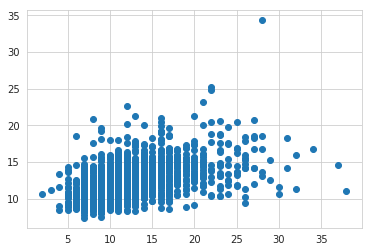

In [34]:
plt.scatter(y_test,y_pred)

/home/kartikchauhan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


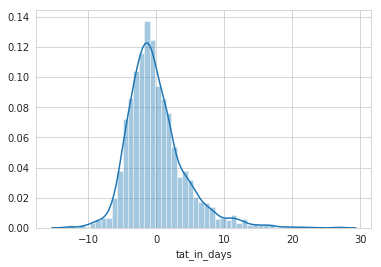

In [35]:
sns.distplot((y_test-y_pred),bins=50);

# Prediction of Test Data

In [36]:
test_data = pd.read_csv("problem_2/problem_2_test.csv")

In [37]:
test_data.shape

(2116, 15)

In [38]:
test_data.isnull().sum()

srno                   0
mobmake                0
hubid                  0
hubpincode             0
pickuppartnerid        0
deliverypartnerid      0
insuranceCompanyId     0
custpincodecategory    0
claimtype              0
custpincode            0
memcreateddate         0
mobilepurchasedate     0
claimintdate           0
servicecntrid          0
pickupStartdate        0
dtype: int64

In [39]:
test_data.memcreateddate = pd.to_datetime(test_data.memcreateddate)
test_data.mobilepurchasedate = pd.to_datetime(test_data.mobilepurchasedate)
test_data.claimintdate = pd.to_datetime(test_data.claimintdate)
test_data.pickupStartdate = pd.to_datetime(test_data.pickupStartdate)

In [40]:
test_data.drop(test_data[test_data['custpincodecategory'] == '0'].index,inplace=True)

In [41]:
dummy_ct = pd.get_dummies(test_data['claimtype'],prefix='claimtype',drop_first=True)
test_data = pd.concat([dummy_ct,test_data],axis=1)
test_data.drop(columns=['claimtype'],inplace=True)


dummy_cp = pd.get_dummies(test_data['custpincodecategory'],prefix = 'custpincodecategory',drop_first=True)
test_data = pd.concat([dummy_cp,test_data],axis=1)
test_data.drop(columns=['custpincodecategory'],inplace=True)


dummy_mob = pd.get_dummies(test_data['mobmake'],prefix = 'mobmake',drop_first=True)
test_data = pd.concat([dummy_mob,test_data],axis=1)
test_data.drop(columns=['mobmake'],inplace=True)

test_data['PCdiff'] = test_data.pickupStartdate - test_data.claimintdate

test_data['PCdiff'] = test_data['PCdiff'].apply(lambda x:x.days)

test_data['ClaMemdiff'] = test_data.claimintdate - test_data.memcreateddate

test_data['ClaMemdiff'] = test_data['ClaMemdiff'].apply(lambda x:x.days)

test_data['ClaMobdiff'] = test_data.claimintdate - test_data.mobilepurchasedate

test_data['ClaMobdiff'] = test_data['ClaMobdiff'].apply(lambda x:x.days)

test_data.drop(columns=['pickupStartdate','claimintdate','mobilepurchasedate','memcreateddate'],inplace=True)

In [42]:
test_data_pred = linreg.predict(test_data)

ValueError: shapes (2052,48) and (52,) not aligned: 48 (dim 1) != 52 (dim 0)

In [43]:
test_data.head(5)

,mobmake_AA,mobmake_AB,mobmake_AC,mobmake_AD,mobmake_AE,mobmake_AF,mobmake_AG,mobmake_AH,mobmake_AI,mobmake_AJ,...,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,PCdiff,ClaMemdiff,ClaMobdiff
0,0,0,0,0,0,0,0,0,0,0,...,3,560011,233,233,131,560093,4467,5,186,189
1,0,0,0,0,0,0,0,0,0,1,...,2,110018,233,233,228,110034,4388,7,199,372
2,0,0,0,0,0,0,0,0,0,1,...,3,560011,233,233,228,590014,4460,7,40,41
3,0,0,0,0,0,0,0,0,0,1,...,2,110018,233,233,228,250110,4388,10,193,271
4,0,0,0,0,0,0,0,0,0,0,...,22,400104,233,233,131,496001,4581,3,102,151


In [52]:
X.shape

(6064, 52)

In [49]:
a = list(X.columns)

In [50]:
b = list(test_data.columns)

In [53]:
for i in b:
    if i not in a:
        print(i)

mobmake_AC
mobmake_AH
mobmake_Q
